<a href="https://colab.research.google.com/github/ecreager/eiil_dev/blob/public/notebooks/plot_cmnist_label_noise_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""Plot results from CMNIST label noise sweep experiments.

See  exps/cmnist.label_noise_sweep.sh for reproducing results.
"""
from collections import defaultdict
from glob import glob
import os
import pickle
from pprint import pprint

import matplotlib.pyplot as plt

def load_results(dirname):
  return pickle.load(open(os.path.join(dirname, 'metrics.p'), 'rb'))
  
def load_flags(dirname):
  return pickle.load(open(os.path.join(dirname, 'flags.p'), 'rb'))

# GLOB_PATTERNS = dict(}
#   irm='/scratch/gobi1/creager/opt_env/cmnist/label_noise_sweep/2020-08-28*/irm',
#   erm='/scratch/gobi1/creager/opt_env/cmnist/label_noise_sweep/2020-08-28*/erm',
#   eiil='/scratch/gobi1/creager/opt_env/cmnist/label_noise_sweep/2020-08-28*/eiil',
#   eiil_cb='/scratch/gobi1/creager/opt_env/cmnist/label_noise_sweep/2020-08-28*/eiil_cb',
#   cb='/scratch/gobi1/creager/opt_env/cmnist/label_noise_sweep/2020-08-28*/cb',
#   gray='/scratch/gobi1/creager/opt_env/cmnist/label_noise_sweep/2020-08-28*/gray',
# )

GLOB_PATTERNS = dict(
  irm='/EIIL_Research/results/EIIL-2222/label_noise_sweep/2021-11-05*/irm',
  erm='/EIIL_Research/results/EIIL-2222/label_noise_sweep/2021-11-05*/erm',
  eiil='/EIIL_Research/results/EIIL-2222/label_noise_sweep/2021-11-05*/eiil',
  eiil_infer='/EIIL_Research/results/EIIL-2222/label_noise_sweep/2021-11-05*/eiil_infer',
  gray='/EIIL_Research/results/EIIL-2222/label_noise_sweep/2021-11-05*/gray',
)
train_accs = defaultdict(dict)
test_accs = defaultdict(dict)
label_noises = set()

for k, v in GLOB_PATTERNS.items():
  print(k)
  pprint(glob(v))
  for dn in glob(v):
    try:
      results = load_results(dn)
      flags = load_flags(dn)
    except:
      print('no metrics or no flags found in', dn)
    label_noises.add(flags.label_noise)
    pprint(flags)
    train_accs[k][flags.label_noise] = results['Train accs']
    test_accs[k][flags.label_noise] = results['Test accs']

label_noises = sorted(label_noises)

irm
['/EIIL_Research/results/EIIL-2222/label_noise_sweep\\2021-11-05--0.10\\irm',
 '/EIIL_Research/results/EIIL-2222/label_noise_sweep\\2021-11-05--0.15\\irm',
 '/EIIL_Research/results/EIIL-2222/label_noise_sweep\\2021-11-05--0.20\\irm',
 '/EIIL_Research/results/EIIL-2222/label_noise_sweep\\2021-11-05--0.25\\irm',
 '/EIIL_Research/results/EIIL-2222/label_noise_sweep\\2021-11-05--0.30\\irm']
Namespace(eiil=False, eiil_infer=False, grayscale_model=False, hidden_dim=390, l2_regularizer_weight=0.00110794568, label_noise=0.1, lr=0.0004898536566546834, n_restarts=10, penalty_anneal_iters=190, penalty_weight=191257.18613115902, results_dir='D:/EIIL_Research/results/EIIL-2222/label_noise_sweep/2021-11-05--0.10/irm', steps=501, test_env__color_noise=0.9, train_env_1__color_noise=0.1, train_env_2__color_noise=0.2)
Namespace(eiil=False, eiil_infer=False, grayscale_model=False, hidden_dim=390, l2_regularizer_weight=0.00110794568, label_noise=0.15, lr=0.0004898536566546834, n_restarts=10, penalty_a

In [2]:
"""Compute confidence intervals to plot."""
means = {'train': defaultdict(list), 'test': defaultdict(list)}
upper_bounds = {'train': defaultdict(list), 'test': defaultdict(list)}
lower_bounds = {'train': defaultdict(list), 'test': defaultdict(list)}

import numpy as np
for method, v in train_accs.items():
  for sigma in label_noises:
    for dset, metrics in {'train': train_accs, 'test': test_accs}.items():
      mean = np.mean(metrics[method][sigma])
      std = np.std(metrics[method][sigma])
      means[dset][method].append(mean)
      upper_bounds[dset][method].append(mean + std)
      lower_bounds[dset][method].append(mean - std)


pprint(means)


{'test': defaultdict(<class 'list'>,
                     {'eiil': [0.5032699882984162,
                               0.5923199892044068,
                               0.637909984588623,
                               0.6374199867248536,
                               0.6031899869441986],
                      'erm': [0.5859899878501892,
                              0.40333998799324033,
                              0.2621999979019165,
                              0.1792199954390526,
                              0.1354599967598915],
                      'gray': [0.8778299748897552,
                               0.8252299845218658,
                               0.772439980506897,
                               0.7204299807548523,
                               0.6662499725818634],
                      'irm': [0.8202099859714508,
                              0.7491299748420716,
                              0.6910899758338929,
                              0.6427099823951721,
 

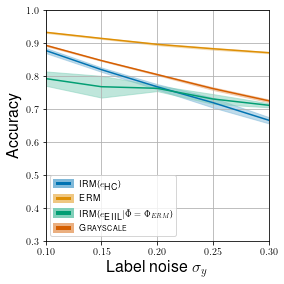

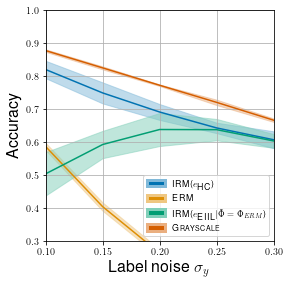

In [15]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import numpy as np
import seaborn as sns

TITLE_FONTSIZE = 16
AXIS_FONTSIZE = 16
LEGEND_FONTSIZE = 9
FIGSIZE = (4, 4)
SHADING_OPACITY = .5  # how opaque should the uncertainty fills be
LATEX_SYMBOLS = dict(
    erm=r'\textsc{ERM}',
    gray=r'\textsc{Grayscale}',
    irm=r'\textsc{IRM}($e_{\textsc{HC}}$)',
    eiil=r'\textsc{IRM}($e_{\textsc{EIIL}}| \tilde \Phi = \Phi_{ERM}$)',
    eiil_infer=r'\textsc{IRM}($e_{\textsc{INFER}}| \tilde \Phi = \Phi_{ERM}$)',
)


class LegendObject(object):
    def __init__(self, facecolor='red', edgecolor='white', dashed=False):
        self.facecolor = facecolor
        self.edgecolor = edgecolor
        self.dashed = dashed
 
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle(
            # create a rectangle that is filled with color
            [x0, y0], width, height, facecolor=self.facecolor,
            # and whose edges are the faded color
            edgecolor=self.edgecolor, lw=3)
        handlebox.add_artist(patch)
 
        # if we're creating the legend for a dashed line,
        # manually add the dash in to our rectangle
        if self.dashed:
            patch1 = mpatches.Rectangle(
                [x0 + 2*width/5, y0], width/5, height, facecolor=self.edgecolor,
                transform=handlebox.get_transform())
            handlebox.add_artist(patch1)
 
        return patch
 
 
def plot_mean_and_CI(label_noise, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(label_noise, ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(label_noise, mean, color=color_mean)
 
# plot the data
a = lambda x: np.array(x)
bg = np.array([1, 1, 1])  # background of the legend is white
for dset in ('train', 'test'):
  from itertools import cycle
  handler_map = dict()
  colors = iter(sns.color_palette("colorblind", len(GLOB_PATTERNS)))
  legend_names = []
  plt.figure(figsize=FIGSIZE)
  for i, method in enumerate(means[dset].keys()):
    legend_names.append(LATEX_SYMBOLS[method])
    color = next(colors)
    color_faded = (np.array(cc.to_rgb(color)) + bg) * SHADING_OPACITY
    handler_map[i] = LegendObject(color, color_faded)
    plot_mean_and_CI(label_noises, 
                     a(means[dset][method]), 
                     a(lower_bounds[dset][method]), 
                     a(upper_bounds[dset][method]),
                     color_mean=color, color_shading=color_faded)
 
  plt.legend(range(len(legend_names)), legend_names, handler_map=handler_map,
             loc='lower left' if dset == 'train' else 'lower right', 
             fontsize=LEGEND_FONTSIZE)
  plt.xlabel(r'Label noise $\sigma_y$', fontsize=AXIS_FONTSIZE)
  #if dset == 'train':
  plt.ylabel('Accuracy', fontsize=AXIS_FONTSIZE)
  plt.tight_layout()
  plt.ylim((0.3, 1.0))
  plt.xlim((0.10,0.30))
  plt.grid()
  plt.show()